# Aula de Pandas (Python)

**Objetivo:** Introduzir `pandas` do zero até operações práticas do dia a dia: criação de `DataFrame`, leitura/escrita, filtros, `loc/iloc`, transformação de colunas, renomear, `groupby`, junções, datas, *reshape* e boas práticas.

**Pré‑requisitos:** Python 3, noções básicas de listas/dicionários, `pip install pandas`.

_Notebook gerado em: 07/10/2025 18:06_

## 1. O que é o Pandas?
- Biblioteca de **análise/manipulação de dados** em Python.

- Principais estruturas:

  - **Series**: vetor unidimensional com rótulos (índice).

  - **DataFrame**: tabela 2D com linhas e colunas rotuladas.

  - **Index**: estrutura que guarda os rótulos (labels) de linhas/colunas.

- Por baixo dos panos: usa **NumPy** (arrays eficientes em C) → operações vetorizadas, desempenho alto.

- Uso típico: **ETL**, limpeza, exploração, engenharia de features, relatórios, ciência de dados.

- Integração fácil com **matplotlib/plotly**, **scikit‑learn**, **SQL**, **parquet** etc.


In [23]:
import pandas as pd
import numpy as np

# Preferência: visualizar DataFrames diretamente (sem print)
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 120)

pd.__version__

'2.1.4'

## 2. Estruturas de dados: Series, DataFrame e Index
### 2.1 Series
- Uma coluna com índice.
- Pode ter dtype numérico, string, datetime, categórico etc.


In [24]:
s = pd.Series([10, 20, 30], index=['a','b','c'], name='minha_serie')
s, s.values, s.index, s.dtype

(a    10
 b    20
 c    30
 Name: minha_serie, dtype: int64,
 array([10, 20, 30]),
 Index(['a', 'b', 'c'], dtype='object'),
 dtype('int64'))

### 2.2 DataFrame
- Tabela com múltiplas Series alinhadas pelo índice.

In [25]:
df = pd.DataFrame({
    'produto': ['A','B','C','A','B','C'],
    'preco':   [10.0, 20.0, 15.0, 11.0, 19.5, 15.5],
    'qtd':     [1, 2, 1, 3, 1, 4],
    'data':    pd.to_datetime(['2025-01-01','2025-01-03','2025-01-03','2025-02-01','2025-02-15','2025-02-20'])
})
df

,produto,preco,qtd,data
0,A,10.0,1,2025-01-01
1,B,20.0,2,2025-01-03
2,C,15.0,1,2025-01-03
3,A,11.0,3,2025-02-01
4,B,19.5,1,2025-02-15
5,C,15.5,4,2025-02-20


### 2.3 Index e dtypes
- O Index rotula as linhas/colunas.
- `dtypes` mostra o tipo de cada coluna.

In [26]:
df.index, df.columns, df.dtypes

(RangeIndex(start=0, stop=6, step=1),
 Index(['produto', 'preco', 'qtd', 'data'], dtype='object'),
 produto            object
 preco             float64
 qtd                 int64
 data       datetime64[ns]
 dtype: object)

## 3. Criando DataFrames
- A partir de **dict**, **lista de dicts**, **NumPy**, ou leitura de **CSV/JSON/Parquet/SQL**.


In [27]:
# Lista de dicionários
dados = [
    {'cidade':'Rio','uf':'RJ','pop': 6748000},
    {'cidade':'São Paulo','uf':'SP','pop': 12330000},
    {'cidade':'Belo Horizonte','uf':'MG','pop': 2533000},
]
cidades = pd.DataFrame(dados)
cidades

,cidade,uf,pop
0,Rio,RJ,6748000
1,São Paulo,SP,12330000
2,Belo Horizonte,MG,2533000


In [28]:
# Gerar um CSV pequeno para demonstração de I/O
import pandas as _pd
_vendas = _pd.DataFrame({
    'id':[1,2,3,4,5,6],
    'produto':['A','B','A','C','B','A'],
    'preco':[10.0, 20.0, 11.0, 15.0, 19.5, 10.5],
    'qtd':[1,2,3,1,1,2],
    'data': _pd.to_datetime(['2025-01-01','2025-01-03','2025-01-05','2025-02-01','2025-02-10','2025-02-10'])
})
_vendas.to_csv("../data/vendas.csv", index=False)
"/mnt/data/vendas.csv"

'/mnt/data/vendas.csv'

## 4. Leitura/Escrita (I/O)
- `pd.read_csv`, `DataFrame.to_csv`
- `pd.read_json`, `pd.read_parquet`, `to_parquet`
- `read_sql` (com engines), `to_sql`


In [29]:
vendas = pd.read_csv("../data/vendas.csv", parse_dates=['data'])
vendas.head()

,id,produto,preco,qtd,data
0,1,A,10.0,1,2025-01-01
1,2,B,20.0,2,2025-01-03
2,3,A,11.0,3,2025-01-05
3,4,C,15.0,1,2025-02-01
4,5,B,19.5,1,2025-02-10


## 5. Seleção e Filtro
### 5.1 Seleção básica de colunas
- `df['col']` ou `df[['c1','c2']]`

### 5.2 Filtro booleano
- Máscaras com comparações (`==`, `>`, `isin`, `str.contains`)

### 5.3 `loc` vs `iloc`
- `loc` usa **rótulos**; `iloc` usa **posições** (0‑based).



In [30]:
# Colunas
vendas[['produto','preco']].head()

,produto,preco
0,A,10.0
1,B,20.0
2,A,11.0
3,C,15.0
4,B,19.5


In [31]:
# Filtro booleano
mask = (vendas['produto']=='A') & (vendas['preco']>=10)
vendas[mask]

,id,produto,preco,qtd,data
0,1,A,10.0,1,2025-01-01
2,3,A,11.0,3,2025-01-05
5,6,A,10.5,2,2025-02-10


In [32]:
# loc (rótulos) e iloc (posições)
vendas.loc[vendas['qtd']>=2, ['id','produto','qtd']].head(), vendas.iloc[:3, :3]

(   id produto  qtd
 1   2       B    2
 2   3       A    3
 5   6       A    2,
    id produto  preco
 0   1       A   10.0
 1   2       B   20.0
 2   3       A   11.0)

### 5.4 `query` (opcional)
Útil para filtros legíveis em strings.

In [33]:
vendas.query("produto in ['A','B'] and preco > 10")

,id,produto,preco,qtd,data
1,2,B,20.0,2,2025-01-03
2,3,A,11.0,3,2025-01-05
4,5,B,19.5,1,2025-02-10
5,6,A,10.5,2,2025-02-10


## 6. Criação/Transformação de Colunas
- `assign`, atribuição direta, `where`/`mask`, `clip`, `round`.
- `rename` para renomear, `drop` para remover.


In [34]:
v2 = (vendas
       .assign(receita = vendas['preco']*vendas['qtd'])
       .rename(columns={'preco':'preco_unit'}))
v2

,id,produto,preco_unit,qtd,data,receita
0,1,A,10.0,1,2025-01-01,10.0
1,2,B,20.0,2,2025-01-03,40.0
2,3,A,11.0,3,2025-01-05,33.0
3,4,C,15.0,1,2025-02-01,15.0
4,5,B,19.5,1,2025-02-10,19.5
5,6,A,10.5,2,2025-02-10,21.0


In [35]:
# Drop de colunas
v2.drop(columns=['qtd']).head()

,id,produto,preco_unit,data,receita
0,1,A,10.0,2025-01-01,10.0
1,2,B,20.0,2025-01-03,40.0
2,3,A,11.0,2025-01-05,33.0
3,4,C,15.0,2025-02-01,15.0
4,5,B,19.5,2025-02-10,19.5


## 7. Ordenação e Amostragem
- `sort_values`, `nlargest`, `sample`

In [36]:
v2.sort_values(['produto','receita'], ascending=[True, False]).head(10)

,id,produto,preco_unit,qtd,data,receita
2,3,A,11.0,3,2025-01-05,33.0
5,6,A,10.5,2,2025-02-10,21.0
0,1,A,10.0,1,2025-01-01,10.0
1,2,B,20.0,2,2025-01-03,40.0
4,5,B,19.5,1,2025-02-10,19.5
3,4,C,15.0,1,2025-02-01,15.0


In [37]:
v2.nlargest(3, 'receita')[['id','produto','receita']]

,id,produto,receita
1,2,B,40.0
2,3,A,33.0
5,6,A,21.0


In [38]:
v2.sample(3, random_state=42)

,id,produto,preco_unit,qtd,data,receita
0,1,A,10.0,1,2025-01-01,10.0
1,2,B,20.0,2,2025-01-03,40.0
5,6,A,10.5,2,2025-02-10,21.0


## 8. Valores Ausentes (NaN)
- `isna`, `fillna`, `dropna`

In [39]:
na_df = v2.copy()
na_df.loc[na_df['produto']=='B','receita'] = np.nan
na_df.isna().mean(), na_df.fillna({'receita':0}).head()

(id            0.000000
 produto       0.000000
 preco_unit    0.000000
 qtd           0.000000
 data          0.000000
 receita       0.333333
 dtype: float64,
    id produto  preco_unit  qtd       data  receita
 0   1       A        10.0    1 2025-01-01     10.0
 1   2       B        20.0    2 2025-01-03      0.0
 2   3       A        11.0    3 2025-01-05     33.0
 3   4       C        15.0    1 2025-02-01     15.0
 4   5       B        19.5    1 2025-02-10      0.0)

## 9. Agrupamento e Agregações (`groupby`)
- `agg` com múltiplas funções
- `as_index=False` para manter colunas

In [40]:
res = (v2
        .groupby('produto', as_index=False)
        .agg(receita_total=('receita','sum'),
             preco_medio=('preco_unit','mean'),
             vendas=('id','count')))
res

,produto,receita_total,preco_medio,vendas
0,A,64.0,10.50,3
1,B,59.5,19.75,2
2,C,15.0,15.00,1


## 10. Junções (merge) e Concatenação
- `merge` (inner/left/right/outer)
- `concat` para empilhar ou lado a lado

In [41]:
# Tabelas auxiliares
info = pd.DataFrame({'produto':['A','B','C'], 'categoria':['X','Y','Y']})
left_join = v2.merge(info, on='produto', how='left')
left_join.head()

,id,produto,preco_unit,qtd,data,receita,categoria
0,1,A,10.0,1,2025-01-01,10.0,X
1,2,B,20.0,2,2025-01-03,40.0,Y
2,3,A,11.0,3,2025-01-05,33.0,X
3,4,C,15.0,1,2025-02-01,15.0,Y
4,5,B,19.5,1,2025-02-10,19.5,Y


In [42]:
# Concat
part1 = v2.iloc[:3]
part2 = v2.iloc[3:]
pd.concat([part1, part2]).equals(v2)

True

## 11. Reshape: `pivot`, `pivot_table`, `melt`
- `pivot_table` agrega automaticamente.
- `melt` transforma colunas em linhas.

In [43]:
pv = pd.pivot_table(v2, index='produto', columns=v2['data'].dt.to_period('M'),
                      values='receita', aggfunc='sum', fill_value=0)
pv

data,2025-01,2025-02
produto,,
A,43.0,21.0
B,40.0,19.5
C,0.0,15.0


In [44]:
melted = pd.melt(v2, id_vars=['id','produto'], value_vars=['preco_unit','qtd','receita'],
                  var_name='medida', value_name='valor')
melted.head()

,id,produto,medida,valor
0,1,A,preco_unit,10.0
1,2,B,preco_unit,20.0
2,3,A,preco_unit,11.0
3,4,C,preco_unit,15.0
4,5,B,preco_unit,19.5


## 12. Datas e Tempos
- `to_datetime`, atributos `.dt`, *resample* para séries temporais.

In [45]:
v_tmp = v2.set_index('data').sort_index()
mensal = v_tmp['receita'].resample('M').sum()
mensal

data
2025-01-31    83.0
2025-02-28    55.5
Freq: M, Name: receita, dtype: float64

## 13. Categóricas
- `astype('category')` para colunas com poucos valores repetidos → memória/velocidade.

In [46]:
cat = v2.copy()
cat['produto'] = cat['produto'].astype('category')
cat.dtypes['produto'], cat['produto'].cat.categories

(CategoricalDtype(categories=['A', 'B', 'C'], ordered=False, categories_dtype=object),
 Index(['A', 'B', 'C'], dtype='object'))

## 14. `apply` vs vetorização (boas práticas)
- Prefira operações vetorizadas (`Series/DataFrame`) a `apply` linha a linha.
- Use `np.where`/`pd.Series.map`/`replace` para condições simples.

In [47]:
# Ex.: criar faixa de receita sem apply linha-a-linha
faixa = pd.cut(v2['receita'], bins=[-1,10,30,1000], labels=['baixa','média','alta'])
v2.assign(faixa=faixa).head()

,id,produto,preco_unit,qtd,data,receita,faixa
0,1,A,10.0,1,2025-01-01,10.0,baixa
1,2,B,20.0,2,2025-01-03,40.0,alta
2,3,A,11.0,3,2025-01-05,33.0,alta
3,4,C,15.0,1,2025-02-01,15.0,média
4,5,B,19.5,1,2025-02-10,19.5,média


## 15. Plot rápido (opcional)
Requer matplotlib instalado. (Evite estilos específicos se não precisar.)

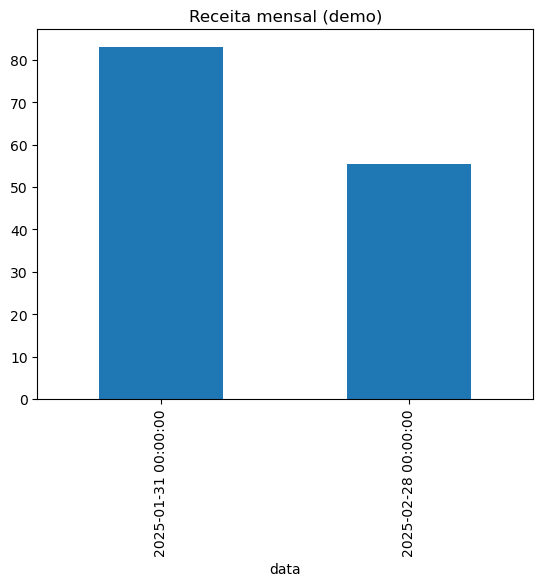

In [48]:
import matplotlib.pyplot as plt

_ = mensal.plot(kind='bar', title='Receita mensal (demo)')
plt.show()

## 16. Dicas e Boas Práticas
- Evite loops Python ao manipular colunas → prefira vetorização.

- Garanta tipos corretos (`astype`), principalmente datas e categóricas.

- Documente suas transformações (pipeline claro) e use `assign`/encadeamento.

- Salve dados intermediários em **parquet** quando possível (compacto e rápido).

- Para datasets grandes: leia com `chunksize`, filtre colunas necessárias, use `categorical`.


## 17. Mini‑exercícios (sem gabarito aqui)
1) **Filtros:** do `DataFrame vendas`, selecione apenas produto 'B' com preço ≥ 19 e mostre `id, produto, preco, qtd`.

2) **Nova coluna:** crie `desconto` de 10% para produto 'A' e 5% para os demais; calcule `receita_liquida`.

3) **Groupby:** compute `receita_total` por mês e produto.

4) **Join:** crie uma tabela com `produto -> departamento` (à sua escolha) e faça um `left join` em `v2`.

5) **Reshape:** gere uma `pivot_table` de `receita` indexada por `produto` e colunas por mês.

6) **Datas:** gere uma série de vendas diárias fictícias (30 dias) e faça um `resample('W')`.

7) **Limpeza:** injete alguns `NaN` em `preco_unit` e trate com `fillna` usando a mediana por produto.

8) **Ordenação:** mostre o top‑3 de `receita` por produto (dica: `groupby` + `nlargest` ou `rank`).



## 18. Referências úteis
- Documentação: https://pandas.pydata.org/docs
- Guia de 10 minutos com pandas: https://pandas.pydata.org/docs/user_guide/10min.html
- Cookbook: https://pandas.pydata.org/docs/user_guide/cookbook.html
